# Is the recent tech-driven bull run in the stock market justified?

##    Problem Statement

On 23 March 2020, the stock market experienced a 40% crash amidst COVID-19 fears. However, the S&P 500 (the most popular US stock benchmark index) has experienced a significant bull run since then, even breaking All-Time Highs. Upon further research, this bull run has been greatly driven by the technology industry. <b> As such, we will be analysing the top 5 holdings (Apple, Microsoft, Amazon, Facebook and Alphabet) of the S&P 500 to determine whether the changes in their balance sheets justify their increased market capitalisation and the concomitant market rally.</b> Coincidentally, they are also major companies in the technology industry.

#### For the sake of simplicity, we will just be calling the top 5 holdings of the S&P500 to be 'FANG', albeit being slightly incorrect.

Our research is based on US equities for 2 reasons. First, data on US equities are more easily accessible for free. Second, the US stock market is one of the few stock markets that have experienced a bull run since the crash in March 2020. In contrast, the Singapore stock market, as measured by the STI index, has not recovered from the crash.

There are also some caveats to this project. 

1. It remains difficult to justify the qualitative aspects of businesses such as economic moat (business' ability to maintain competitive advantages over its competitors) or its competitors. 

2. Due to the timeline of the project, we are only able to make use of data from Q1 and Q2 of 2020. Therefore, the machine learning model used may be limited due to the lack of data.

3. The machine learning models to be used are simplified and hold many assumptions. In addition, the discounted cash flow analysis that will later be used to predict a business’ future cash flow may not be 100% reliable as the rates are merely an estimate.


## Project Breakdown:
1) Examining the correlation between FANG stocks and the S&P 500

2) Finding the  index weight of FANG stocks in the S&P 500

3) Analyzing the different finanical indicators of FANG 

4) Using the discounted cash flow model to gauge if a stock is at a discount or a premium

5) Using Linear Regression to predict the future revenue of the FANG companies 

##  In this secton we shall be examining the correlation between the FANG stocks and the S&P 500

Importing dependencies and reading obtaining our data from yahoo finance.

In [1]:
#Acquiring data through online API
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 10, 12)

fang = ['AAPL','AMZN','FB','GOOGL','MSFT']

fang_df =  web.DataReader (fang,'yahoo',start=start,end=end)['Adj Close']
fang_df.tail()


Symbols,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2020-10-06,113.160004,3099.959961,258.660004,1451.020020,205.910004
2020-10-07,115.080002,3195.689941,258.119995,1459.140015,209.830002
2020-10-08,114.970001,3190.550049,263.760010,1483.430054,210.580002
2020-10-09,116.970001,3286.649902,264.450012,1510.449951,215.809998
2020-10-12,124.400002,3442.929932,275.750000,1564.589966,221.399994


Using the changing stock prices, we try to find the percentage change and hence correlation.

In [2]:
#Getting the correlation table
pct_change_df = fang_df.pct_change()
corr = pct_change_df.corr()
corr

Symbols,AAPL,AMZN,FB,GOOGL,MSFT
Symbols,,,,,
AAPL,1.000000,0.442538,0.385258,0.529984,0.555278
AMZN,0.442538,1.000000,0.442217,0.578364,0.523760
FB,0.385258,0.442217,1.000000,0.494163,0.408050
GOOGL,0.529984,0.578364,0.494163,1.000000,0.607912
MSFT,0.555278,0.523760,0.408050,0.607912,1.000000


Plotting heatmap for the correlation.

([<matplotlib.axis.YTick at 0x2b0dffaffd0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 0, 'AMZN'),
  Text(0, 0, 'FB'),
  Text(0, 0, 'GOOGL'),
  Text(0, 0, 'MSFT')])

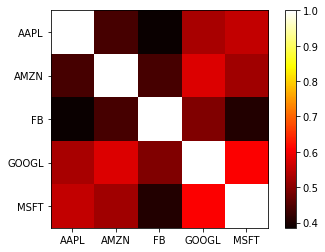

In [3]:
#Displaying correlation graph
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

### INSIGHTS:
1) FANG stock price show moderate to high positive correlation with one another

Obtaining the price changes of the S&P 500 index.

In [4]:
#Acquiring data through online API
GSPC_index_series = web.DataReader ('^GSPC','yahoo',start=start,end=end)['Adj Close']
GSPC_index_series = GSPC_index_series.rename('GSPC')

In [5]:
fang_sector_df = pd.concat([fang_df,GSPC_index_series], axis = 1)
fang_sector_df

,AAPL,AMZN,FB,GOOGL,MSFT,GSPC
Date,,,,,,
2009-12-31,6.503574,134.520004,NaN,310.300293,23.801456,1115.099976
2010-01-04,6.604801,133.899994,NaN,313.688690,24.168472,1132.989990
2010-01-05,6.616219,134.690002,NaN,312.307312,24.176279,1136.520020
2010-01-06,6.510980,132.250000,NaN,304.434448,24.027906,1137.140015
2010-01-07,6.498945,130.000000,NaN,297.347351,23.778025,1141.689941
...,...,...,...,...,...,...
2020-10-06,113.160004,3099.959961,258.660004,1451.020020,205.910004,3360.969971
2020-10-07,115.080002,3195.689941,258.119995,1459.140015,209.830002,3419.439941
2020-10-08,114.970001,3190.550049,263.760010,1483.430054,210.580002,3446.830078


Adding the S&P 500 to the heatmap so we can get a better picture.

([<matplotlib.axis.YTick at 0x2b0dfdd35e0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 0, 'AMZN'),
  Text(0, 0, 'FB'),
  Text(0, 0, 'GOOGL'),
  Text(0, 0, 'MSFT'),
  Text(0, 0, 'GSPC')])

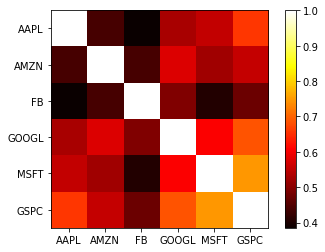

In [6]:
#Plotting the correlation graph
pct_change_df = fang_sector_df.pct_change()
corr = pct_change_df.corr()
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

### Insights
2) High correlation with the S&P 500 as well, though based on just correlation alone it can't be determined if there is causation and to which way

In order to prove that the FANG stocks can be a good representation of the S&P 500, we shall be examining the collective index weight of FANG in the S&P 500

AS the S&P 500 is a collection of the total market cap of all the top 500 companies, by taking the total market cap of FANG and dividing by the total market cap of the S&P 500, we will be able to determine their index weight and their influence on the stock as a whole

In [7]:
#Reading the csv file for S&P 500 ticker symbols and creating dataframe. Then using dictionary comprehension to 
#create a dictionary containing company ticker symbol as key and the market cap as value
GSPC_companies_data_df = pd.read_csv('constituents-financials_csv.csv')
company_list = GSPC_companies_data_df['Symbol']
GSPC_companies_data_df.set_index('Symbol', inplace=True)
GSPC_companies_data_df.head()
market_cap_dict = {company : GSPC_companies_data_df.loc[company,'Market Cap'] for company in company_list}

In [8]:
def append_value(dict_obj, key, value):
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
        dict_obj[key].append(value)
    else:
        dict_obj[key] = value

In [9]:
total_market_cap= 0

for value in market_cap_dict.values():
    total_market_cap += value
    
for key,value in market_cap_dict.items():
    index_weight = (value/ total_market_cap) * 100
    append_value(market_cap_dict,key,index_weight)

In [10]:
sorted_dict = {company: cap for company, cap in sorted(market_cap_dict.items(), key=lambda item: item[1],reverse = True)}
total_weight_by_fang = 0
for company in fang:
    total_weight_by_fang += sorted_dict[company][1]

In [11]:
print('{}%'.format(round(total_weight_by_fang)))

14.0%


### Insight
3) The top 5 companies pull approx 14% weight out of an index made out of 500 companies. Hence, they definitely has a major influence on the index

## In this section we shall be examining and comparing the different financial indicators of FANG 

Present and compare the different company's performance of the selected list of companies (top 5 holdings of the S&P 500) based on various financial ratios calculated.

The following are the ratios that we will use to compare the companies' performance.

1. Gross Profit Margin, Net Profit Margin (Can be obtained from Income Statement)
    - Determines how much money the business can retain for each good sold.
    - For eg., if the business can take a profit of 20c for every $1 earned, their net profit margin is 20%.
    
    
2. Working Capital Ratio (Can be obtained from Balance Sheet)
    - Current Assets/Current Liabilities (What you have/What you owe)
    - Ideally >1
    
    
3. Quick Ratio (Can be obtained from Balance Sheet/Cash Flow)
    - (cash + accounts receivable)/current liabilities
    - Analyses the business’ short-term liquidity
    - For eg., if something major happens to an industry (like COVID causing a huge delay in AirBnb’s IPO), the firm still has enough money in the short-run to pay off debt
    - Quick ratio tends to be more conservative
    
    
4. P/E Ratio, PEG Ratio (Can be obtained from Income Statement as well as Zacks, Reuters, Finviz)
    - PE Ratio is used to analyse the value of a company
        - Diluted EPS will be used
        - We will use trailing PE ratio (instead of forward PE ratio), because we have past data and do not want estimates to convolute our analysis
        - In addition, companies can purposely lower expectations in order to beat them in the next quarter. So, we want to be as objective as possible.
    - PEG ratio is used to analyse a stock's value while also factoring in the company's expected earnings growth
    
    
5. Debt to Equity Ratio (Can be obtained from Balance Sheet)
    - Used to analyse a company’s financial leverage
    
    
6. Return on Equity (Can be obtained from Income Statement/Balance Sheet)
    - ROE is considered a measure of how effectively management is using a company’s assets to create profits


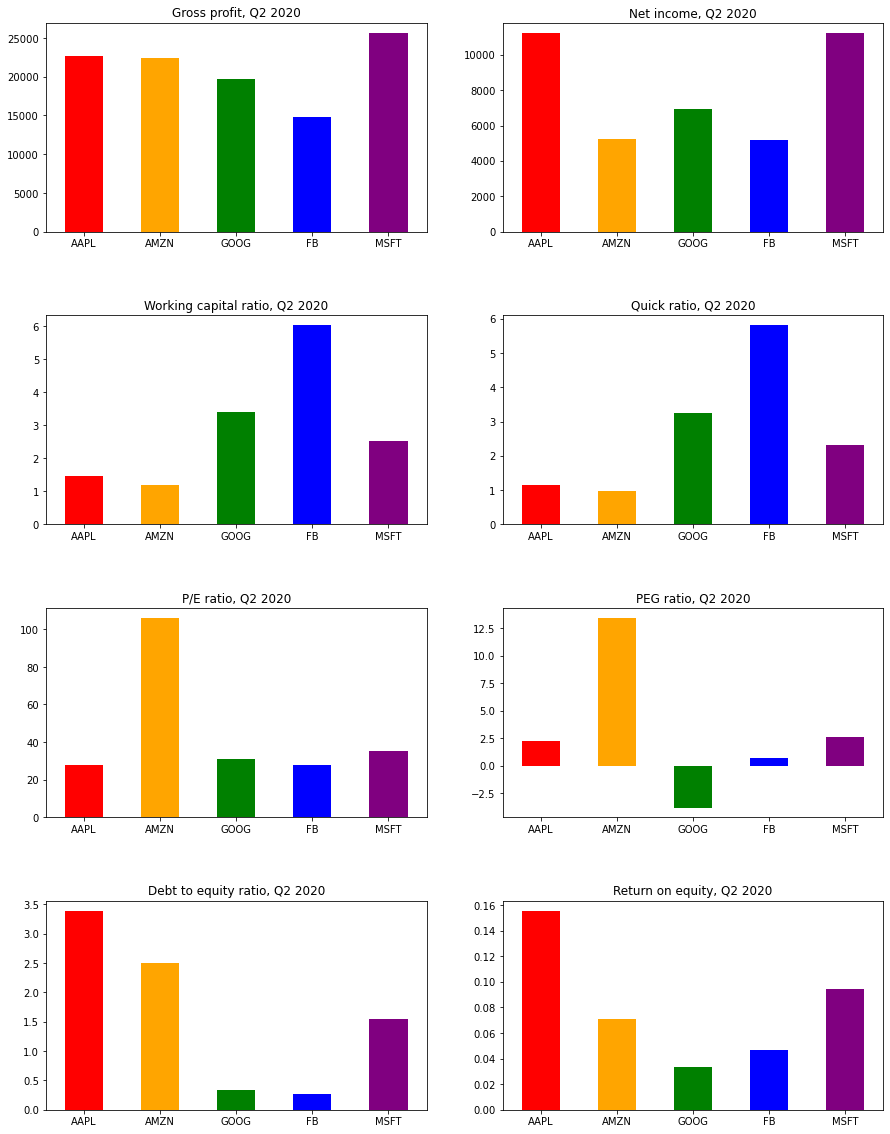

In [12]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

#------------------------------------------------------------------
#csv is imported, with errors in headers and index rectified
aapl_is_df = pd.read_csv('AAPL Income Statement.csv',header=1,index_col=0)
aapl_bs_df = pd.read_csv('AAPL Balance Sheet.csv',header=1,index_col=0)
aapl_cf_df = pd.read_csv('AAPL Cash Flow.csv',header=1,index_col=0)

amzn_is_df = pd.read_csv('AMZN Income Statement.csv',header=1,index_col=0)
amzn_bs_df = pd.read_csv('AMZN Balance Sheet.csv',header=1,index_col=0)
amzn_cf_df = pd.read_csv('AMZN Cash Flow.csv',header=1,index_col=0)

goog_is_df = pd.read_csv('GOOG Income Statement.csv',header=1,index_col=0)
goog_bs_df = pd.read_csv('GOOG Balance Sheet.csv',header=1,index_col=0)
goog_cf_df = pd.read_csv('GOOG Cash Flow.csv',header=1,index_col=0)

fb_is_df = pd.read_csv('FB Income Statement.csv',header=1,index_col=0)
fb_bs_df = pd.read_csv('FB Balance Sheet.csv',header=1,index_col=0)
fb_cf_df = pd.read_csv('FB Cash Flow.csv',header=1,index_col=0)

msft_is_df = pd.read_csv('MSFT Income Statement.csv',header=1,index_col=0)
msft_bs_df = pd.read_csv('MSFT Balance Sheet.csv',header=1,index_col=0)
msft_cf_df = pd.read_csv('MSFT Cash Flow.csv',header=1,index_col=0)


#------------------------------------------------------------------
#for each company, create dataframes, filter for relevant data rows and remove duplicates in data
aapl_list = [aapl_is_df,aapl_bs_df,aapl_cf_df]
amzn_list = [amzn_is_df,amzn_bs_df,amzn_cf_df]
goog_list = [goog_is_df,goog_bs_df,goog_cf_df]
fb_list = [fb_is_df,fb_bs_df,fb_cf_df]
msft_list = [msft_is_df,msft_bs_df,msft_cf_df]

aapl_df = pd.concat(aapl_list)
amzn_df = pd.concat(amzn_list)
goog_df = pd.concat(goog_list)
fb_df = pd.concat(fb_list)
msft_df = pd.concat(msft_list)

rel_data = ['Gross profit','Net income','Total current assets','Total current liabilities','Total liabilities','Total cash','Receivables','Diluted','Total stockholders\' equity']


i = 0
tech_df = [aapl_df,amzn_df,goog_df,fb_df,msft_df]
for df in tech_df:
    df = df.loc[rel_data]
    df = df[~df.index.duplicated(keep='first')]
    df = df.transpose()
    if i == 0:
        aapl_df = df
    if i == 1:
        amzn_df = df
    if i == 2:
        goog_df = df
    if i == 3:
        fb_df = df
    else:
        msft_df = df
    i += 1
   
    
#------------------------------------------------------------------
#additional csv with historical stock prices is imported for calculation of P/E ratio
aapl_hq_df = pd.read_csv('AAPL Historical Quotes.csv',index_col=0)
amzn_hq_df = pd.read_csv('AMZN Historical Quotes.csv',index_col=0)
goog_hq_df = pd.read_csv('GOOG Historical Quotes.csv',index_col=0)
fb_hq_df = pd.read_csv('FB Historical Quotes.csv',index_col=0)
msft_hq_df = pd.read_csv('MSFT Historical Quotes.csv',index_col=0)

hq_df = [aapl_hq_df,amzn_hq_df,goog_hq_df,fb_hq_df,msft_hq_df]
qtr_dates = ['06/28/2019','09/30/2019','12/31/2019','03/31/2020','06/30/2020']


i = 0
hq_df = [aapl_hq_df,amzn_hq_df,goog_hq_df,fb_hq_df,msft_hq_df]
tech_df = [aapl_df,amzn_df,goog_df,fb_df,msft_df]
for df in hq_df:
    df = df.loc[qtr_dates].rename(index={"06/28/2019": "2019-06", "09/30/2019": "2019-09", "12/31/2019": "2019-12", "03/31/2020": "2020-03", "06/30/2020": "2020-06"})
    df[' Close/Last'] = df[' Close/Last'].str.strip().str[1:].astype('float64')
    tech_df[i]['EOQ stock price'] = df[' Close/Last']
    i += 1

    
#------------------------------------------------------------------
#calculate diluted EPS (TTM) for Q1,Q2 2020 and earnings growth rate for Q2 2020

tech_df = [aapl_df,amzn_df,goog_df,fb_df,msft_df]
for df in tech_df:
    df['Diluted EPS (TTM)'] = df['Diluted']
    df['Diluted EPS (TTM)'][3] = sum(df['Diluted'][0:4])
    df['Diluted EPS (TTM)'][4] = sum(df['Diluted'][1:5])
    df['Diluted EPS (TTM)'][0:3] = np.nan

i = 0
q2_2019_eps = [2.94,24.11,49.54,5.9,5.06] #cheating a bit due to small dataset    
tech_df = [aapl_df,amzn_df,goog_df,fb_df,msft_df]
for df in tech_df:
    df['Diluted EPS (TTM)'][0] = q2_2019_eps[i]
    df['Earnings growth rate'] = df['Diluted EPS (TTM)']
    df['Earnings growth rate'] = (df['Diluted EPS (TTM)'][4] - df['Diluted EPS (TTM)'][0])/df['Diluted EPS (TTM)'][0]*100
    df['Earnings growth rate'][0:4] = np.nan
    i += 1

#------------------------------------------------------------------
#calculate financial ratios

tech_df = [aapl_df,amzn_df,goog_df,fb_df,msft_df]
for df in tech_df:
    df['Working capital ratio'] = df['Total current assets']/df['Total current liabilities']
    df['Quick ratio'] = (df['Total cash'] + df['Receivables'])/df['Total current liabilities']
    df['P/E ratio'] = df['EOQ stock price']/df['Diluted EPS (TTM)']
    df['PEG ratio'] = df['P/E ratio']/df['Earnings growth rate']
    df['Debt to equity ratio'] = df['Total liabilities']/df['Total stockholders\' equity']
    df['Return on equity'] = df['Net income']/df['Total stockholders\' equity']

#------------------------------------------------------------------
#merge relevant Q2 2020 data of 5 companies into 1 table

q2_2020_df = pd.DataFrame()
final_ind = ['Gross profit','Net income','Working capital ratio','Quick ratio','P/E ratio','PEG ratio','Debt to equity ratio','Return on equity']

i = 0
tech_index = ['AAPL','AMZN','GOOG','FB','MSFT']
tech_df = [aapl_df,amzn_df,goog_df,fb_df,msft_df]
for df in tech_df:
    q2_2020_df[tech_index[i]] = df[final_ind].loc['2020-06']
    i += 1

q2_2020_df = q2_2020_df.transpose()

#------------------------------------------------------------------
#plot graphs


fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

i = 0
for ind in final_ind:
    q2_2020_df[ind].plot(
        kind = 'bar',
        ax = ax_list[i],
        title = ind + ', Q2 2020',
        color = ['red','orange','green','blue','purple']
        )
    ax_list[i].set_xticklabels(tech_index,rotation=0)
    i += 1
    
plt.subplots_adjust(hspace=0.4)  

plt.show()



>1. Gross Profit Margin, Net Profit Margin (Can be obtained from Income Statement)
    - Determines how much money the business can retain for each good sold.
    - For eg., if the business can take a profit of 20c for every $1 earned, their net profit margin is 20%.
    
<b>All 5 holdings have very high gross profits. However, comparing it to net income, we can see that Apple and Microsoft enjoys very high profit margins.</b>

For Apple, this is possibly due to its wide economic moat and extreme brand loyalty. For Microsoft, it could be due to its Azure Cloud services. However, this space has been heating up recently, with competitors such as Amazon Web Services and Google Cloud.

However, the other 3 companies still manage to pull off very impressive net incomes, which ultimately proves their business models.
___
    
>2. Working Capital Ratio (Can be obtained from Balance Sheet)
    - Current Assets/Current Liabilities (What you have/What you owe)
    - Ideally >1
    
<b>All 5 companies have working capital ratios of more than 1. However, Facebook has an abnormally high working capital ratio.</b>    

Although a high working capital ratio indicates positive cash flow for a company, it is not ideal for it to be too high. This will show that the company has no idea where to invest its money in for better profits.

I am surprised that Facebook, still one of the fastest growers has such a high working capital ratio. Ideally, it should resemble something like Amazon's, which is very aggressive in growth. This may be due to Facebook's more conservative approach, often staying in their space of social media and earning mainly from ad revenue.
___    
    
>3. Quick Ratio (Can be obtained from Balance Sheet/Cash Flow)
    - (cash + accounts receivable)/current liabilities
    - Analyses the business’ short-term liquidity
    - For eg., if something major happens to an industry (like COVID causing a huge delay in AirBnb’s IPO), the firm still has enough money in the short-run to pay off debt
    - Quick ratio tends to be more conservative
    
<b>All 5 holdings have very healthy quick ratios, which shows their strong short-term liquidity positions. They can remain agile in dire scenarios like a recession.</b>    
___    
    
>4. P/E Ratio, PEG Ratio (Can be obtained from Income Statement as well as Zacks, Reuters, Finviz)
    - PE Ratio is used to analyse the value of a company
        - Diluted EPS will be used
        - We will use trailing PE ratio (instead of forward PE ratio), because we have past data and do not want estimates to convolute our analysis
        - In addition, companies can purposely lower expectations in order to beat them in the next quarter. So, we want to be as objective as possible.
    - PEG ratio is used to analyse a stock's value while also factoring in the company's expected earnings growth
    
<b>The industry standard PE Ratio for tech companies is around 30. This is evident in our graph, except for Amazon. Amazon remains an aggressive grower even after attaining such large size.</b>

This shows that future earnings for Amazon has already been priced in, as investors are expecting greater growth from them.

<b>For the PEG Ratio, we can see that Amazon's growth has been heavily priced in by the investors. One interesting fact is that the 2 ad revenue companies (Alphabet and Facebook) has not very good PEG Ratios.</b>

This may indicate that the market has maybe reached saturation level already.
___
>5. Debt to Equity Ratio (Can be obtained from Balance Sheet)
    - Used to analyse a company’s financial leverage

<b>Outside of Facebook and Alphabet, the other 3 companies have pretty high leverages. This may showcase their ability to pay off debt, but can also be a sign of risk for investors.</b>

Due to the nature of the industry, Alphabet and Facebook cannot stand to have such high leverages and had to scale down on their debt.
___
>6. Return on Equity (Can be obtained from Income Statement/Balance Sheet)
    - ROE is considered a measure of how effectively management is using a company’s assets to create profits
    
<b>Apple's ROE is very impressive as demonstrated by their significantly high profit margins.</b>

Once again, Alphabet and Facebook has slightly lower than average ROE, possibly due to the nature of the industry.
___

# In this section, we will use the Discounted Cash Flow (DCF) Model to guage whether a stock is at a discount or a premium.

<i>Disclaimer: I am not a financial advisor and this article is not meant to represent any form of financial advice. Any investments you make using these calculations will carry risk so do remember to do your due diligence and research before doing so.</i>

## The concept behind DCF
>Imagine there exists a machine which will generate 100 in a year’s time. Would you pay 100 for it? Is 100 a break-even price?

### No!
#### This is because you have to wait a year to get the 100!

Instead, if you were to invest the 100 in a risk-interest rate of 2%, for example, you would receive 100 x 1.02 = 102 in a year's time. Hence, your 100 is worth 102 next year.

---

>So, what is the maximum amount of money you would pay for it to break-even? 


In other words, what is 100 received next year worth this year? To receive 100 in a year at a risk free interest rate of 2%, you would only need to make a risk-free investment of 100/1.02 = 98.04 this year. So you should pay a maximum of 98.04 for such a machine. In this example, 100 in a year is worth 96.15 today.


### Money received in the future is worth less today.

>What about a machine which generates 100 in the next year, AND 100 in the following year?

We already know that 100 in the next year is worth 98.04 today.

<b>100 in two years’ time is worth 100/1.02² = 96.12 today (100 divided by 1.02 twice). (i.e. investing 96.12 at 2% interest will get you 200 in 2 years.)</b>

Hence for this machine, you would pay a maximum of 98.04 + 96.12 = 194.16 today, which is of course lower than 200.

>What about a machine which generates 100 in each of the next 5 years?


### Future Cash Flows Discounted to Present Value
<img src="https://i.imgur.com/ZNg0zQx.png">

---

Hence, the general formula for calculating the present value of a machine which generates a cash flow of CF₁ in year 1, CF₂ in year 2 and so on for n years is this, assuming the discount rate is r:
Image for post
In the previous example of the machine, we have used a discount rate r equal to the risk-free rate of investing which we are assuming to be 2% (i.e. 0.02). This is not necessarily the case as we shall see later when we explore more about the discount rate.

_Note that future cash flows can increase if the company is growing. Also note that each one of the future cash flows are discounted to the present value before all of them are summed up to form the total present value._

<b>After calculating the present value of future cash flows, we need to add the cash and short term investments as well as subtract the total debt.</b>

### This is what we talked about summarised into an equation.
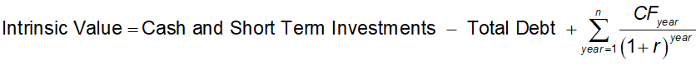

### Now we will walk through the calculation of the instrinsic value for AAPL (the largest component of S&P 500).
##### After that, we will just calculate the other 4 companies without walkthrough for simplicity.

In [13]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [14]:
apiKey = "c666ff95d41eef82744356cb28a0c041"
ticker = "AAPL"

#### Firstly, we will obtain quarterly cash flow statements.

In [15]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-06-27,1.125300e+10,2.752000e+09,833000000.0,1.698000e+09,-4.300000e+08,-2.135000e+09,-689000000.0,2.733000e+09,4.474700e+10,1.863000e+09,...,-1.911600e+10,0.0,-8010000000,32164000000,4.017400e+10,1.627100e+10,-1.565000e+09,1.470600e+10,NaN,NaN
2020-03-28,1.124900e+10,2.786000e+09,-302000000.0,1.697000e+09,-2.002000e+09,5.269000e+09,727000000.0,-1.243100e+10,4.765900e+10,1.580000e+09,...,-2.094000e+10,0.0,1384000000,41155000000,3.977100e+10,1.331100e+10,-1.853000e+09,1.145800e+10,NaN,NaN
2019-12-28,2.223600e+10,2.816000e+09,-349000000.0,1.710000e+09,4.245000e+09,2.015000e+09,-28000000.0,-1.089000e+09,6.107000e+10,1.568000e+09,...,-2.540700e+10,0.0,-8559000000,40285000000,4.884400e+10,3.051600e+10,-2.107000e+09,2.840900e+10,NaN,NaN
2019-09-28,1.368600e+10,3.179000e+09,-302000000.0,1.499000e+09,2.160000e+09,-8.768000e+09,-785000000.0,1.788100e+10,5.710100e+10,1.187000e+09,...,-2.103900e+10,0.0,-1927000000,48603000000,5.053000e+10,1.991000e+10,-2.777000e+09,1.713300e+10,NaN,NaN


#### Now, we will repeat the above, but this time, for annual cash flow statements.

In [16]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2019-09-28,55256000000,12547000000,-3.400000e+08,6.068000e+09,-3488000000,2.450000e+08,-289000000,-1.923000e+09,5.710100e+10,5.416000e+09,...,-9.097600e+10,0.0,24311000000,50224000000,25913000000,69391000000,-10495000000,58896000000,NaN,NaN
2018-09-29,59531000000,10903000000,-3.259000e+10,5.340000e+09,34694000000,-5.322000e+09,828000000,9.175000e+09,1.447300e+10,4.896000e+09,...,-8.787600e+10,0.0,5624000000,25913000000,20289000000,77434000000,-13313000000,64121000000,NaN,NaN
2017-09-30,48351000000,10157000000,5.966000e+09,4.840000e+09,-4923000000,-2.093000e+09,-2723000000,9.618000e+09,2.783100e+10,4.674000e+09,...,-1.797400e+10,0.0,-195000000,20289000000,20484000000,64225000000,-12451000000,51774000000,NaN,NaN
2016-09-24,45687000000,10505000000,4.938000e+09,4.210000e+09,405000000,1.095000e+09,217000000,1.791000e+09,2.786300e+10,4.696000e+09,...,-2.089000e+10,0.0,-636000000,20484000000,21120000000,66231000000,-12734000000,53497000000,NaN,NaN
2015-09-26,53394000000,11257000000,1.382000e+09,3.586000e+09,11647000000,6.110000e+08,-238000000,5.400000e+09,8.768000e+09,3.586000e+09,...,-1.771600e+10,0.0,7276000000,21120000000,13844000000,81266000000,-11488000000,69778000000,NaN,NaN


#### Now, we will combine the above 2 dataframes.

This will give us the cash flow statements for the past 4 years as well as the Trailing Twelve Months (TTM).

In [17]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,1.153300e+10,-1.200000e+08,6.604000e+09,3.973000e+09,-3.619000e+09,-7.750000e+08,7.094000e+09,2.105770e+11,6.198000e+09,8.000800e+10,...,-8.650200e+10,0.0,-1.711200e+10,1.622070e+11,1.793190e+11,8.000800e+10,-8.302000e+09,7.170600e+10,0.0,0.0
2019-09-28,1.254700e+10,-3.400000e+08,6.068000e+09,-3.488000e+09,2.450000e+08,-2.890000e+08,-1.923000e+09,5.710100e+10,5.416000e+09,6.939100e+10,...,-9.097600e+10,0.0,2.431100e+10,5.022400e+10,2.591300e+10,6.939100e+10,-1.049500e+10,5.889600e+10,NaN,NaN
2018-09-29,1.090300e+10,-3.259000e+10,5.340000e+09,3.469400e+10,-5.322000e+09,8.280000e+08,9.175000e+09,1.447300e+10,4.896000e+09,7.743400e+10,...,-8.787600e+10,0.0,5.624000e+09,2.591300e+10,2.028900e+10,7.743400e+10,-1.331300e+10,6.412100e+10,NaN,NaN
2017-09-30,1.015700e+10,5.966000e+09,4.840000e+09,-4.923000e+09,-2.093000e+09,-2.723000e+09,9.618000e+09,2.783100e+10,4.674000e+09,6.422500e+10,...,-1.797400e+10,0.0,-1.950000e+08,2.028900e+10,2.048400e+10,6.422500e+10,-1.245100e+10,5.177400e+10,NaN,NaN
2016-09-24,1.050500e+10,4.938000e+09,4.210000e+09,4.050000e+08,1.095000e+09,2.170000e+08,1.791000e+09,2.786300e+10,4.696000e+09,6.623100e+10,...,-2.089000e+10,0.0,-6.360000e+08,2.048400e+10,2.112000e+10,6.623100e+10,-1.273400e+10,5.349700e+10,NaN,NaN


#### Now we will look at Apple's Free Cash Flow for the past 15 years.
This is to check the stability of their cash flows.

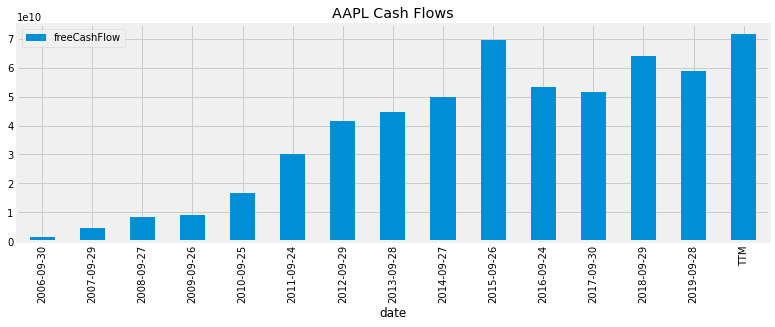

In [18]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

#### Now, we shall obtain the balance sheet of Apple.

The balance sheet shows a snapshot of the company’s financial health (all the assets and liabilities that it has) at a moment in time (not summed up over a period of time as with cash flow statement). To get the relevant data of a company to calculate the intrinsic value, we simply need the balance sheet statement for the most recent quarter.

In [19]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-06-27,33383000000,5.964200e+10,93025000000,32075000000,3.978000e+09,10987000000,140065000000,43851000000,0.0,0.0,...,24136000000,-5.500000e+08,-2.163000e+09,72282000000,317344000000,1.602340e+11,1.133730e+11,7.999000e+10,NaN,NaN
2020-03-28,40174000000,5.387700e+10,94051000000,30677000000,3.334000e+09,15691000000,143753000000,43986000000,0.0,0.0,...,33182000000,-2.789000e+09,-1.315000e+09,78425000000,320400000000,1.526700e+11,1.101550e+11,6.998100e+10,NaN,NaN
2019-12-28,39771000000,6.739100e+10,107162000000,39946000000,4.097000e+09,12026000000,163231000000,44293000000,0.0,0.0,...,43977000000,-4.180000e+08,-1.240000e+09,89531000000,340618000000,1.672900e+11,1.089330e+11,6.916200e+10,NaN,NaN
2019-09-28,48844000000,5.171300e+10,100557000000,45804000000,4.106000e+09,12352000000,162819000000,37378000000,0.0,0.0,...,45898000000,-5.840000e+08,-1.291000e+09,90488000000,338516000000,1.570540e+11,1.080470e+11,5.920300e+10,NaN,NaN
2019-06-29,50530000000,4.408400e+10,94614000000,26474000000,3.355000e+09,10530000000,134973000000,37636000000,0.0,0.0,...,53724000000,-6.390000e+08,-9.670000e+08,96456000000,322239000000,1.600800e+11,1.084180e+11,5.788800e+10,NaN,NaN


In [20]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0


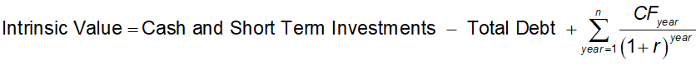

Now let us look at this image above. We have Total Debt as well as Cash and ST investments already.
>What else do we need?

In order to obtain the growth rate of the company, we will be using <a href="https://finviz.com/" ><b>Finviz</b></a>.

We will use the <b>'EPS Next 5Y'</b> to estimate the growth rate of the company for the next 5 years.

After that, we will be more conservative, and halve the growth rate of the company for the next 5 years.

Seeing that the largest holdings of the S&P 500 tend to change around in 5-10 years time (look at General Electric and Exxon Mobile), we will let the growth rate of Apple to be growing along with the inflation rate at 3%, which is what Jerome Powell (Chairman of Federal Reserve) expects for the near future.

From Finviz, we would like to extract the Price, EPS next 5Y, Beta (How closely correlated the stock is to the market) and the number of Shares Outstanding.

In [21]:
# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 119.02,
 'EPS next 5Y': 12.6,
 'Beta': 1.34,
 'Shs Outstand': 17250000000.0}

Next, from the Beta, we will need to calculate the discount factor so that we can plug it into our formula.

Instead of using the risk-free rate, which is usually taken to be the 10-year yield of US Treasury Bonds, we will base it off Beta.

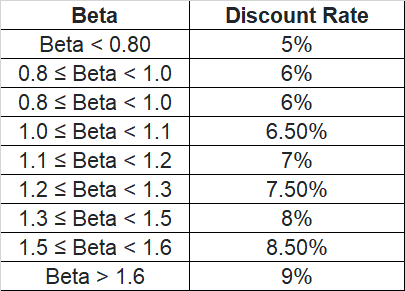

This is the rough guide we will be using.

In [22]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

print("Discount Rate: ", discount_rate)

Discount Rate:  8


In [23]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 3)

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0
EPS Growth 5Y:  12.6
EPS Growth 6Y to 10Y:  6.3
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  8
Shares Outstanding:  17250000000.0


Discounted Cash Flows

Year 1: $74760144444.44443
Year 2: $77944372818.93001
Year 3: $81264225735.29184
Year 4: $84725479794.38759
Year 5: $88334157637.48186
Year 6: $86943712563.55853
Year 7: $85575154125.05806
Year 8: $84228137810.12659
Year 9: $82902324529.782
Year 10: $81597380532.55392
Year 11: $77819724026.41716
Year 12: $74216959025.19414
Year 13: $70780988699.95367
Year 14: $67504091074.95581
Year 15: $64378901673.33748
Year 16: $61398396966.238525
Year 17: $58555878588.17192
Year 18: $55844958283.16396
Year 19: $53259543547.8323
Year 20: $50793823939.13635


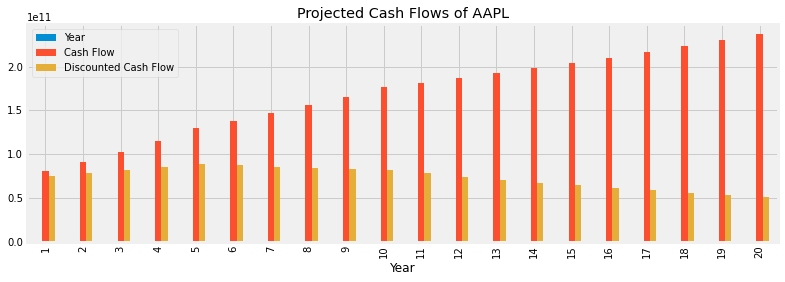

In [24]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)   

In [25]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)    

Intrinsic Value:  83.62204961252267
Current Price:  119.02
Margin of Safety:  -42.3308810911714


In [26]:
# Pseudo-code thought process
# 1. Obtain quarterly cash flow statements
# 2. Obtain annual cash flow statements
# 3. Combine the 2 dataframes and form TTM row
# 4. Obtain Free Cash Flows for past 15 years to plot graph and check stability of cash flows
# 5. Get balance sheet
# 6. From balance sheet, obtain total debt as well as cash and short-term investments
# 7. Go to finviz to scrape 'Price', 'EPS next 5Y', 'Beta', 'Shs Outstand'
# 8. From Beta obtained, calculate Discount Factor
# 9. Assign the relevant values to variables
# 10. Calculate future cash flows
# 11. Plot cash flows on grow
# 12. Obtain intrinsic value and calculate margin of safety

AAPL Summary
----------------------------------------------------------------------------------------------------


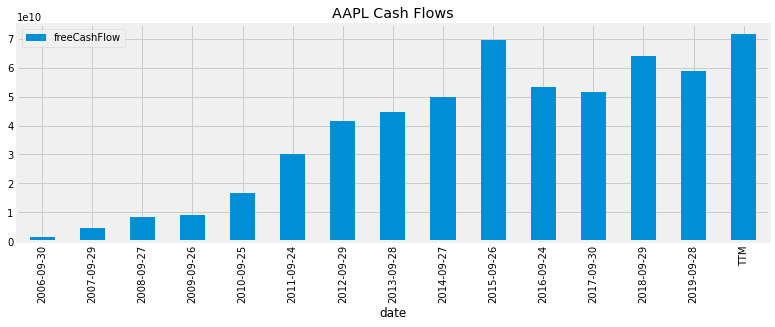

Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0
Discount Rate:  8
Free Cash Flow:  71706000000.0
Total Debt:  113373000000.0
Cash and ST Investments:  93025000000.0
EPS Growth 5Y:  12.6
EPS Growth 6Y to 10Y:  6.3
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  8
Shares Outstanding:  17250000000.0
Discounted Cash Flows

Year 1: $74760144444.44443
Year 2: $77944372818.93001
Year 3: $81264225735.29184
Year 4: $84725479794.38759
Year 5: $88334157637.48186
Year 6: $86943712563.55853
Year 7: $85575154125.05806
Year 8: $84228137810.12659
Year 9: $82902324529.782
Year 10: $81597380532.55392
Year 11: $77819724026.41716
Year 12: $74216959025.19414
Year 13: $70780988699.95367
Year 14: $67504091074.95581
Year 15: $64378901673.33748
Year 16: $61398396966.238525
Year 17: $58555878588.17192
Year 18: $55844958283.16396
Year 19: $53259543547.8323
Year 20: $50793823939.13635


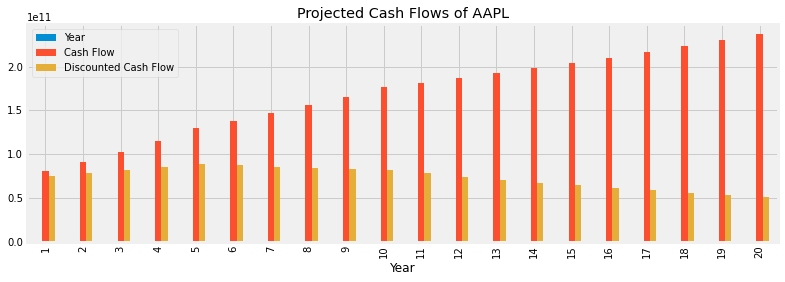

Intrinsic Value:  83.62204961252267
Current Price:  119.02
Margin of Safety:  -42.3308810911714
END OF AAPL
----------------------------------------------------------------------------------------------------
AMZN Summary
----------------------------------------------------------------------------------------------------


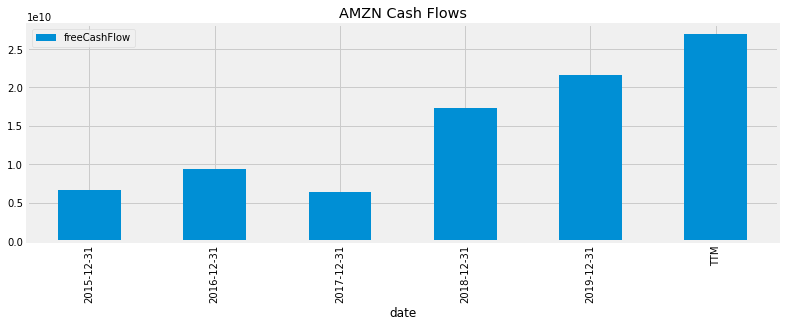

Free Cash Flow:  26957000000.0
Total Debt:  51011000000.0
Cash and ST Investments:  71391000000.0
Discount Rate:  7.5
Free Cash Flow:  26957000000.0
Total Debt:  51011000000.0
Cash and ST Investments:  71391000000.0
EPS Growth 5Y:  36.03
EPS Growth 6Y to 10Y:  18.015
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  7.5
Shares Outstanding:  500000000.0
Discounted Cash Flows

Year 1: $34111262418.604652
Year 2: $43164232807.46783
Year 3: $54619819430.69627
Year 4: $69115665461.9313
Year 5: $87458641607.31644
Year 6: $96013317109.6507
Year 7: $105404759243.6784
Year 8: $115714815461.79262
Year 9: $127033339039.28798
Year 10: $139458972155.5495
Year 11: $133621154716.48003
Year 12: $128027711030.67389
Year 13: $122668411499.15733
Year 14: $117533454738.72751
Year 15: $112613449656.64124
Year 16: $107899398275.66556
Year 17: $103382679278.07956
Year 18: $99055032238.53206
Year 19: $94908542516.9191
Year 20: $90935626783.65271


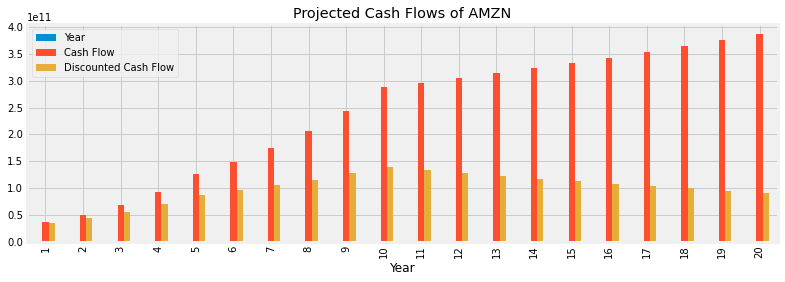

Intrinsic Value:  4006.2405709410086
Current Price:  3272.71
Margin of Safety:  18.309698530378395
END OF AMZN
----------------------------------------------------------------------------------------------------
MSFT Summary
----------------------------------------------------------------------------------------------------


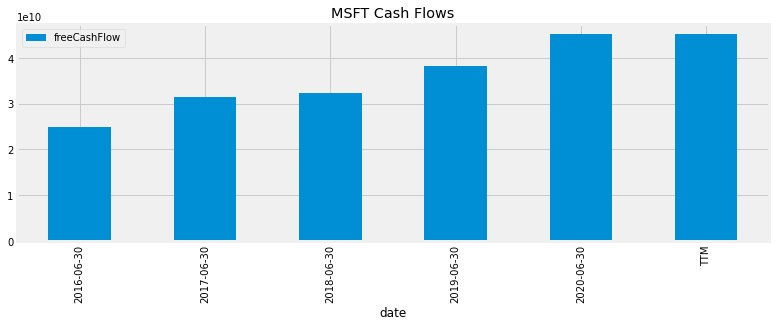

Free Cash Flow:  45234000000.0
Total Debt:  72823000000.0
Cash and ST Investments:  136527000000.0
Discount Rate:  6
Free Cash Flow:  45234000000.0
Total Debt:  72823000000.0
Cash and ST Investments:  136527000000.0
EPS Growth 5Y:  14.97
EPS Growth 6Y to 10Y:  7.485
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  6
Shares Outstanding:  7580000000.0
Discounted Cash Flows

Year 1: $49061820566.037735
Year 2: $53213561419.59771
Year 3: $57716633551.04857
Year 4: $62600767541.1703
Year 5: $67898209851.02216
Year 6: $68849425338.08601
Year 7: $69813966815.69977
Year 8: $70792020973.44803
Year 9: $71783777116.33076
Year 10: $72789427201.4039
Year 11: $70729349073.06227
Year 12: $68727575042.6926
Year 13: $66782454994.31451
Year 14: $64892385513.34334
Year 15: $63055808564.8525
Year 16: $61271210209.24346
Year 17: $59537119354.26488
Year 18: $57852106542.351715
Year 19: $56214782772.285164
Year 20: $54623798354.20162


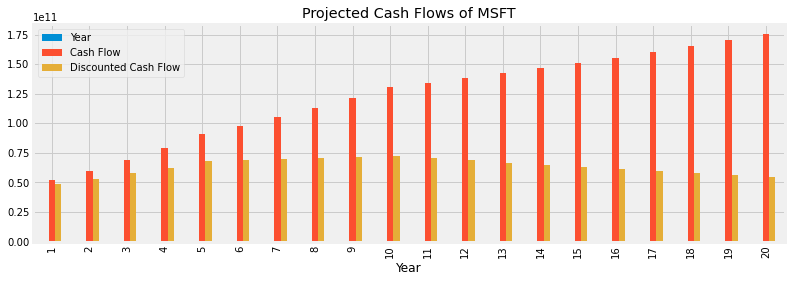

Intrinsic Value:  175.7137468066566
Current Price:  219.66
Margin of Safety:  -25.010139497906714
END OF MSFT
----------------------------------------------------------------------------------------------------
GOOGL Summary
----------------------------------------------------------------------------------------------------


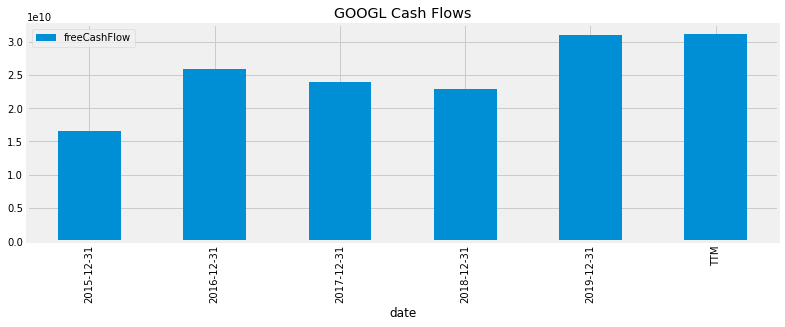

Free Cash Flow:  31157000000.0
Total Debt:  5154000000.0
Cash and ST Investments:  121080000000.0
Discount Rate:  6.5
Free Cash Flow:  31157000000.0
Total Debt:  5154000000.0
Cash and ST Investments:  121080000000.0
EPS Growth 5Y:  4.81
EPS Growth 6Y to 10Y:  2.405
EPS Growth 11Y to 20Y:  2.405
Discount Rate:  6.5
Shares Outstanding:  681770000.0
Discounted Cash Flows

Year 1: $30662583755.868546
Year 2: $30176013177.958523
Year 3: $29697163766.965565
Year 4: $29225912999.20808
Year 5: $28762140295.27699
Year 6: $27656215745.89521
Year 7: $26592814774.257263
Year 8: $25570302318.852726
Year 9: $24587106187.437683
Year 10: $23641714639.66719
Year 11: $22732674062.67717
Year 12: $21858586736.041836
Year 13: $21018108682.670082
Year 14: $20209947602.33643
Year 15: $19432860884.66913
Year 16: $18685653698.5403
Year 17: $17967177154.92037
Year 18: $17276326540.372017
Year 19: $16612039618.467575
Year 20: $15973294996.518044


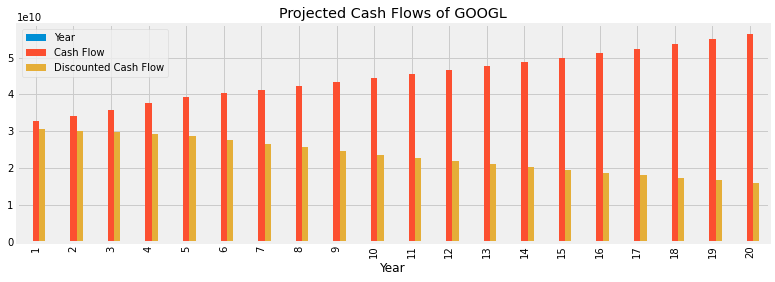

Intrinsic Value:  856.9820285999688
Current Price:  1567.7
Margin of Safety:  -82.93265759156168
END OF GOOGL
----------------------------------------------------------------------------------------------------
FB Summary
----------------------------------------------------------------------------------------------------


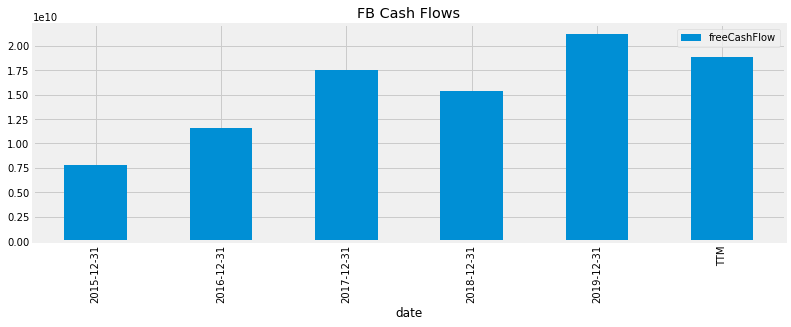

Free Cash Flow:  18823000000.0
Total Debt:  472000000.0
Cash and ST Investments:  58240000000.0
Discount Rate:  7.5
Free Cash Flow:  18823000000.0
Total Debt:  472000000.0
Cash and ST Investments:  58240000000.0
EPS Growth 5Y:  20.27
EPS Growth 6Y to 10Y:  10.135
EPS Growth 11Y to 20Y:  3.0
Discount Rate:  7.5
Shares Outstanding:  2850000000.0
Discounted Cash Flows

Year 1: $21058997302.325584
Year 2: $23560610284.192543
Year 3: $26359391617.486862
Year 4: $29490642138.001347
Year 5: $32993856092.441143
Year 6: $33802589216.195396
Year 7: $34631145705.35516
Year 8: $35480011462.87713
Year 9: $36349684301.99045
Year 10: $37240674238.13692
Year 11: $35681762293.284676
Year 12: $34188107127.51927
Year 13: $32756977061.716145
Year 14: $31385754766.10943
Year 15: $30071932473.574615
Year 16: $28813107393.285442
Year 17: $27606977316.357216
Year 18: $26451336405.43994
Year 19: $25344071160.561058
Year 20: $24283156553.8399


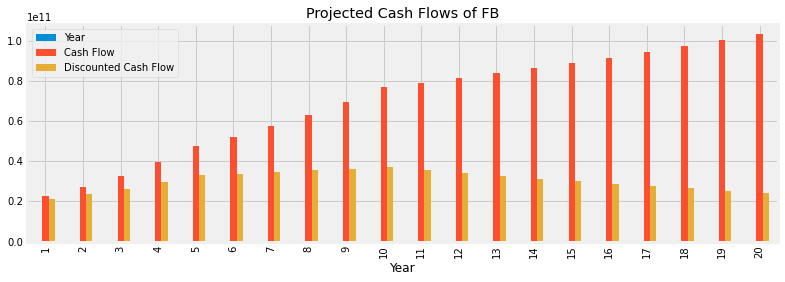

Intrinsic Value:  233.44518768796146
Current Price:  265.93
Margin of Safety:  -13.915391717331072
END OF FB
----------------------------------------------------------------------------------------------------


In [27]:
tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'FB']

for ticker in tickers:
    print(ticker + " Summary")
    print("-"*100)
    
    q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + 
                                                             '?period=quarter' + '&apikey=' + apiKey))
    q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
    q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

    cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
    cash_flow_statement = cash_flow_statement.set_index('date')
    cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
    ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
    cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
    final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
    
    final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
    plt.show()
    
    q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + 
                                                           '&apikey=' + apiKey))
    q_balance_statement = q_balance_statement.set_index('date')
    q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
    
    cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
    total_debt = q_balance_statement.iloc[0]['totalDebt'] 
    cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

    print("Free Cash Flow: ", cash_flow)
    print("Total Debt: ", total_debt)
    print("Cash and ST Investments: ", cash_and_ST_investments)
    
    # List of data we want to extract from Finviz Table
    metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

    def fundamental_metric(soup, metric):
        # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
        return soup.find(text = metric).find_next(class_='snapshot-td2').text

    def get_finviz_data(ticker):
        try:
            url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
            soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
            dict_finviz = {}        
            for m in metric:   
                dict_finviz[m] = fundamental_metric(soup,m)
            for key, value in dict_finviz.items():
                # replace percentages
                if (value[-1]=='%'):
                    dict_finviz[key] = value[:-1]
                    dict_finviz[key] = float(dict_finviz[key])
                # billion
                if (value[-1]=='B'):
                    dict_finviz[key] = value[:-1]
                    dict_finviz[key] = float(dict_finviz[key])*1000000000  
                # million
                if (value[-1]=='M'):
                    dict_finviz[key] = value[:-1]
                    dict_finviz[key] = float(dict_finviz[key])*1000000
                try:
                    dict_finviz[key] = float(dict_finviz[key])
                except:
                    pass 
        except Exception as e:
            print (e)
            print ('Not successful parsing ' + ticker + ' data.')        
        return dict_finviz

    finviz_data = get_finviz_data(ticker)

    finviz_data
    
    Beta = finviz_data['Beta']

    discount_rate = 7
    if(Beta<0.80):
        discount_rate = 5
    elif(Beta>=0.80 and Beta<1):
        discount_rate = 6
    elif(Beta>=1 and Beta<1.1):
        discount_rate = 6.5
    elif(Beta>=1.1 and Beta<1.2):
        discount_rate = 7
    elif(Beta>=1.2 and Beta<1.3):
        discount_rate =7.5
    elif(Beta>=1.3 and Beta<1.4):
        discount_rate = 8
    elif(Beta>=1.4 and Beta<1.6):
        discount_rate = 8.5
    elif(Beta>=1.61):
        discount_rate = 9   

    print("Discount Rate: ", discount_rate)
    
    EPS_growth_5Y = finviz_data['EPS next 5Y']
    EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
    EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 3)

    shares_outstanding = finviz_data['Shs Outstand']

    print("Free Cash Flow: ", cash_flow)
    print("Total Debt: ", total_debt)
    print("Cash and ST Investments: ", cash_and_ST_investments)

    print("EPS Growth 5Y: ", EPS_growth_5Y)
    print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
    print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

    print("Discount Rate: ", discount_rate)

    print("Shares Outstanding: ", shares_outstanding)
    
    def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
        # Convert all percentages to decmials
        EPS_growth_5Y_d = EPS_growth_5Y/100
        EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
        EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
        discount_rate_d = discount_rate/100
        print("Discounted Cash Flows\n")

        # Lists of projected cash flows from year 1 to year 20
        cash_flow_list = []
        cash_flow_discounted_list = []
        year_list = []


        # Years 1 to 5
        for year in range(1, 6):
            year_list.append(year)
            cash_flow*=(1 + EPS_growth_5Y_d)        
            cash_flow_list.append(cash_flow)
            cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
            cash_flow_discounted_list.append(cash_flow_discounted)
            print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows

        # Years 6 to 10
        for year in range(6, 11):
            year_list.append(year)
            cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
            cash_flow_list.append(cash_flow)
            cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
            cash_flow_discounted_list.append(cash_flow_discounted)
            print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows

        # Years 11 to 20
        for year in range(11, 21):
            year_list.append(year)
            cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
            cash_flow_list.append(cash_flow)
            cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
            cash_flow_discounted_list.append(cash_flow_discounted)
            print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows

        intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
        df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': 
                                     cash_flow_discounted_list})
        df.index = df.Year
        df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
        plt.show()

        return intrinsic_value


    intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                      EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                      shares_outstanding, discount_rate)   
    print("Intrinsic Value: ", intrinsic_value)
    current_price = finviz_data['Price']
    print("Current Price: ", current_price)
    print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)
    
    print("END OF " + ticker)
    print("-"*100)


### In this section we shall be using linear regression to predict the future revenue of FANG 

In [28]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
regr = linear_model.LinearRegression()

In [29]:
#import the data sets
aapl_df = pd.read_csv('AAPL Q Income.csv',header = None,index_col=0)
fb_df = pd.read_csv('FB Q Income.csv',header = None,index_col=0)
goog_df = pd.read_csv('GOOG Q Income.csv',header = None,index_col=0)
amzn_df = pd.read_csv('AMZN Q Income.csv',header = None,index_col=0)
msft_df = pd.read_csv('MSFT Q Income.csv',header = None,index_col=0)

In [30]:
#select the 1st 2 rows
aapl_q_revenue_df = aapl_df.iloc[[0,1]]
fb_q_revenue_df = fb_df.iloc[[0,1]]
goog_q_revenue_df = goog_df.iloc[[0,1]]
amzn_q_revenue_df = amzn_df.iloc[[0,1]]
msft_q_revenue_df = msft_df.iloc[[0,1]]

#Renaming
aapl_q_revenue_df.index = ['Quarters', 'Revenue']
fb_q_revenue_df.index = ['Quarters', 'Revenue']
goog_q_revenue_df.index = ['Quarters', 'Revenue']
amzn_q_revenue_df.index = ['Quarters', 'Revenue']
msft_q_revenue_df.index = ['Quarters', 'Revenue']

#Transpose into columns
aapl_q_revenue_df = aapl_q_revenue_df.T
fb_q_revenue_df = fb_q_revenue_df.T
goog_q_revenue_df = goog_q_revenue_df.T
amzn_q_revenue_df = amzn_q_revenue_df.T
msft_q_revenue_df = msft_q_revenue_df.T

#Flip the table
aapl_q_revenue_df = aapl_q_revenue_df.iloc[::-1]
fb_q_revenue_df = fb_q_revenue_df.iloc[::-1]
goog_q_revenue_df = goog_q_revenue_df.iloc[::-1]
amzn_q_revenue_df = amzn_q_revenue_df.iloc[::-1]
msft_q_revenue_df = msft_q_revenue_df.iloc[::-1]

#create a new column
aapl_q_revenue_df = aapl_q_revenue_df.reset_index(drop=True).reset_index()
fb_q_revenue_df = fb_q_revenue_df.reset_index(drop=True).reset_index()
goog_q_revenue_df = goog_q_revenue_df.reset_index(drop=True).reset_index()
amzn_q_revenue_df = amzn_q_revenue_df.reset_index(drop=True).reset_index()
msft_q_revenue_df = msft_q_revenue_df.reset_index(drop=True).reset_index()

#change the data type
aapl_q_revenue_df['Revenue'] = aapl_q_revenue_df['Revenue'].apply(lambda x: int(x))
fb_q_revenue_df['Revenue'] = fb_q_revenue_df['Revenue'].apply(lambda x: int(x))
goog_q_revenue_df['Revenue'] = goog_q_revenue_df['Revenue'].apply(lambda x: int(x))
amzn_q_revenue_df['Revenue'] = amzn_q_revenue_df['Revenue'].apply(lambda x: int(x))
msft_q_revenue_df['Revenue'] = msft_q_revenue_df['Revenue'].apply(lambda x: int(x))


In [31]:
#create a new "Revenue(Millions)" column
aapl_q_revenue_df['Revenue(Millions)'] = aapl_q_revenue_df['Revenue'].apply(lambda x: int(x)).apply(lambda x: x/1000000).apply(lambda x: int(x))
fb_q_revenue_df['Revenue(Millions)'] = fb_q_revenue_df['Revenue'].apply(lambda x: int(x)).apply(lambda x: x/1000000).apply(lambda x: int(x))
goog_q_revenue_df['Revenue(Millions)'] = goog_q_revenue_df['Revenue'].apply(lambda x: int(x)).apply(lambda x: x/1000000).apply(lambda x: int(x))
amzn_q_revenue_df['Revenue(Millions)'] = amzn_q_revenue_df['Revenue'].apply(lambda x: int(x)).apply(lambda x: x/1000000).apply(lambda x: int(x))
msft_q_revenue_df['Revenue(Millions)'] = msft_q_revenue_df['Revenue'].apply(lambda x: int(x)).apply(lambda x: x/1000000).apply(lambda x: int(x))

In [32]:
#AAPL LR
aapl_y = aapl_q_revenue_df[['Revenue(Millions)']]
aapl_X = aapl_q_revenue_df[['index']]
aapl_X_train, aapl_X_test, aapl_y_train, aapl_y_test = train_test_split( aapl_X, aapl_y, random_state=100 )


aapl_lr = linear_model.LinearRegression()
aapl_lr.fit(aapl_X_train,aapl_y_train)

LinearRegression()

In [33]:
#FB LR
fb_y = fb_q_revenue_df[['Revenue(Millions)']]
fb_X = fb_q_revenue_df[['index']]
fb_X_train, fb_X_test, fb_y_train, fb_y_test = train_test_split(fb_X, fb_y, random_state=100 )


fb_lr = linear_model.LinearRegression()
fb_lr.fit(fb_X_train,fb_y_train)

LinearRegression()

In [34]:
#GOOG LR
goog_y = goog_q_revenue_df[['Revenue(Millions)']]
goog_X = goog_q_revenue_df[['index']]
goog_X_train, goog_X_test, goog_y_train, goog_y_test = train_test_split( goog_X, goog_y, random_state=100 )


goog_lr = linear_model.LinearRegression()
goog_lr.fit(goog_X_train,goog_y_train)

LinearRegression()

In [35]:
#AMZN LR
amzn_y = amzn_q_revenue_df[['Revenue(Millions)']]
amzn_X = amzn_q_revenue_df[['index']]
amzn_X_train, amzn_X_test, amzn_y_train, amzn_y_test = train_test_split( amzn_X, amzn_y, random_state=100 )


amzn_lr = linear_model.LinearRegression()
amzn_lr.fit(amzn_X_train,amzn_y_train)

LinearRegression()

In [36]:
#MSFT LR
msft_y = msft_q_revenue_df[['Revenue(Millions)']]
msft_X = msft_q_revenue_df[['index']]
msft_X_train, msft_X_test, msft_y_train, msft_y_test = train_test_split( msft_X, msft_y, random_state=100 )


msft_lr = linear_model.LinearRegression()
msft_lr.fit(msft_X_train,msft_y_train)

LinearRegression()

In [37]:
#AAPL LR reliability
predicted_aapl_y = aapl_lr.predict(aapl_X_test)
score = r2_score(aapl_y_test , predicted_aapl_y)
print(score)

0.10567923589045902


In [38]:
#FB LR reliability
predicted_fb_y = fb_lr.predict(fb_X_test)
score = r2_score(fb_y_test , predicted_fb_y)
print(score)

0.9260262653571127


In [39]:
#GOOG LR reliability
predicted_goog_y = goog_lr.predict(goog_X_test)
score = r2_score(goog_y_test , predicted_goog_y)
print(score)

0.9433351695735562


In [40]:
#AMZN LR reliability
predicted_amzn_y = amzn_lr.predict(amzn_X_test)
score = r2_score(amzn_y_test , predicted_amzn_y)
print(score)

0.8749856109324905


In [41]:
#MSFT LR reliability
predicted_msft_y = msft_lr.predict(msft_X_test)
score = r2_score(msft_y_test , predicted_msft_y)
print(score)

0.8355864675975804


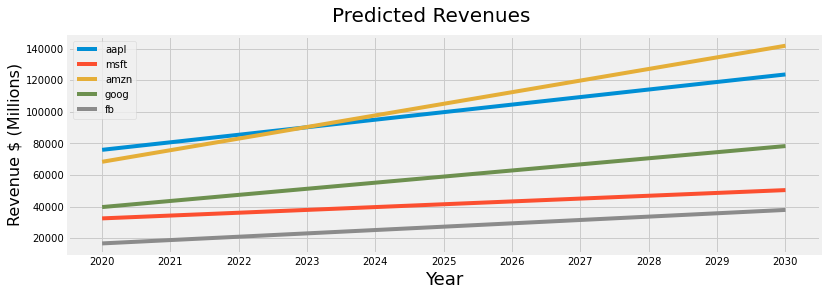

In [42]:
def retrieve_number(array):
    for sub_array in array:
        for number in sub_array:
            return number
        
tickers = ['aapl', 'msft', 'amzn', 'goog', 'fb']        
aapl_array = []
msft_array = [] 
amzn_array = []
goog_array = [] 
fb_array = []

df_array = []

for ticker in tickers:
    for year in range(2020, 2031):
        x = [[(year-2011) * 4 + 1]]

        if ticker == 'aapl':
                
            predicted_2d_array = aapl_lr.predict(x)
            predicted_number = retrieve_number(predicted_2d_array)
            aapl_array.append(predicted_number)

        if ticker == 'msft':
                  
            predicted_2d_array = msft_lr.predict(x)
            predicted_number = retrieve_number(predicted_2d_array)
            msft_array.append(predicted_number)
            
        if ticker == 'amzn':
                  
            predicted_2d_array = amzn_lr.predict(x)
            predicted_number = retrieve_number(predicted_2d_array)
            amzn_array.append(predicted_number)
            
        if ticker == 'goog':
                  
            predicted_2d_array = goog_lr.predict(x)
            predicted_number = retrieve_number(predicted_2d_array)
            goog_array.append(predicted_number)
            
        if ticker == 'fb':
                   
            predicted_2d_array = fb_lr.predict(x)
            predicted_number = retrieve_number(predicted_2d_array)
            fb_array.append(predicted_number)
            

aapl_predicted = pd.DataFrame(aapl_array, index=range(2020, 2031), columns=["AAPL Revenue"])
df_array.append(aapl_predicted)
msft_predicted = pd.DataFrame(msft_array, index=range(2020, 2031), columns=["MSFT Revenue"])
df_array.append(msft_predicted)
amzn_predicted = pd.DataFrame(amzn_array, index=range(2020, 2031), columns=["AMZN Revenue"])
df_array.append(amzn_predicted)
goog_predicted = pd.DataFrame(goog_array, index=range(2020, 2031), columns=["GOOG Revenue"])
df_array.append(goog_predicted)
fb_predicted = pd.DataFrame(fb_array, index=range(2020, 2031), columns=["FB Revenue"])
df_array.append(fb_predicted)

# print(df_array)
            
fig = plt.figure()

for frame in df_array:
    plt.plot(frame, label='ticker')

fig.suptitle('Predicted Revenues', fontsize=20)
plt.legend(tickers)
plt.xticks(range(2020, 2031))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Revenue $ (Millions)', fontsize=16)
plt.show()

In the graph above, we can see the annual predicted revenues of the top 5 holdings. Due to limited time and knowledge, we only applied simple linear regression. The revenue growth of companies is definitely not linear. Moreover, in the past decade, the revenue growth of these companies have boomed and this linear regression model takes data from 2011. This may not be as accurate in the present day. These companies are approaching maturity and saturation. Therefore, it is unlikely they are able to grow as well as before.

Nevertheless, we used a linear regression model to showcase the predicted revenues of the 5 holdings.

# Conclusion

## Is the recent tech-driven bull run in the stock market justified?

### Quantitatively speaking, using the data we have gathered and the analysis, no. The bull run has not been justified by their balance sheets.

As compared to their balance sheets, some holdings still show some weakness. Yet, the recovery was pretty smooth sailing.

## What have we learnt from our project?

1. We managed to examine the correlation between FANG stocks and the S&P 500. We have managed to prove that they are quite heavily correlated.However, correlation is not causation. We are unable to determine whether the FANG Stocks are propping up the index or whether it is the other way round.


2. We managed to determine the index weight of the FANG stocks. Although not completely targeted at answering our main question, it shows that our analysis is correct and taking the largest holdings make sense because their price changes will affect the index to a greater extent.


3. Using the various financial indicators and ratios, we have managed to determine that all 5 companies are great businesses. Their balance sheets, cash flows, and income statements right now are solid and still remain resilient in the current pandemic. This shows that the bull run has not been completely unreasonable as these tech stocks continue to increase growth even during these tough times.


4. Using a very conservative version of the Discounted Cash Flow Model, we have managed to guage that these stocks are all selling at a premium. They all exhibit negative margin of safety. This shows that investors are too bullish on these tech stocks. This is our main reasoning behind why we think the recent bull run is not very justified. Although balance sheets remain strong, it does not remain in line with the index.


5. Lastly, we used a simple machine learning model, regression, to predict the future revenue of these companies. All of them show positive growth, which is a result of their past performance in the last decade.

## A stock analysis is definitely not complete without the qualitative aspect.

##### In this section, we will quickly run through the business models of all 5 companies. Then we will explain what have happened to their businesses during this pandemic. Using that information, we will try to dissect whether it is justifiable that their stock prices are so high right now and investors are so bullish on them.

### AAPL
___

#### Business Model

For the past decade, the main driver of Apple's revenue has been from the iPhone. However, as technology advances, the yearly changes from the previous generation to the next become less apparent. It is becoming harder and harder for Apple to convince buyers to purchase the new model of the iPhone every year. In order to maintain their business, they have been branching out to other segments such as their Services. They have been offering various services such as AppleCare+, ApplePay, Apple Fitness+, Apple Music, Apple TV and more. As these services use a subscription based model, it gives investors some relief because there is consistent predictable income. Apple has been working hard to remove their reliance on the iPhone. Moreover, they are also leveraging on the fact that they own your pocket. Once you stepped into their ecosystem, they try to entice you with more of their products, which just works so well together. In addition, their wide economic moat as well as brand loyalty from consumers has served them well as they continue to sell products with crazy high profit margins.

#### Why we think investors are so bullish on them right now

Investors are bullish on them mainly because they are the biggest public company in the world. They offer stability as well as dividend growth. They also offer wide economic moat. Apple is beginning to recognise the importance of capturing market share of the low price phone markets, and are therefore beginning to release more models of iPhones that cater to that market. Although still not very successful, they are very successful in their flagship models and investors like the non-competition in that area of the market.

In addition, investors are beginning to understand the transition towards services the Apple has been making. Apple is not just a technology hardware company, they are a financial services company like Mastercard and Visa (ApplyPay), they are a fitness company like Peloton and Johnson & Johnson (Apple Fitness+), they are a music streaming company like Spotify (Apple Music), they are an entertainment company like Disney and Netflix (Apple TV). This diversified income stream is why investors like Apple. Although their services segment remain small even in the US, it is rapidly growing along with their wearables segment.

### MSFT
___

#### Business Model

Out of these 5 holdings, Microsoft has the most diversified income stream. Their main driver of revenue comes from their Cloud Services (Microsoft Azure), which is highly profitable. This is the one that runs many websites you use today. Also, they earn their money from Office 365. Many companies use Outlook and Excel today. Recently, Microsoft has also been quite aggressive with promoting Microsoft Teams. This is a direct competitor to Slack. Along with the more seamless experience from transitioning from Teams to Outlook, it just makes more sense for businesses to switch to Microsoft Teams. They are using their economic moat to draw in more revenue. Lastly, Microsoft also dabbles in the fast-growing gaming industry with Xbox One. There are also honorable mentions such as LinkedIn, and their Surface devices.

#### Why we think investors are so bullish on them right now

Investors are probably bullish on Microsoft right now because their income stream is just so diversified. Although Apple is making the transition, Microsoft has already made the transition to the diversified income stream. They do not have a truly dominant revenue source. Moreover, with the lockdown and the pandemic, people are more likely to use telecommunication services like their Office 365 Products and Microsoft Teams. As for entertainment, they can also opt for Xbox Gaming. Lastly, with the rise of technology, people need laptops and technology hardware, therefore they look for Surface Laptops which are actually very good Windows devices.

However, I believe Microsoft is the most mature company out of these five. They have the least to grow from here on as well. This is unless they make another important acquisition (which they often do), to make up another revenue source.

### AMZN
___

#### Business Model

If you think Microsoft Azure was good, Amazon has the world's most popular cloud service, Amazon Web Services (AWS). This part of their business is often overlooked because of their larger and more well-known e-commerce business. Although e-commerce gives Amazon more revenue, AWS provides Amazon with a higher profit margin. Data has become so cheap, along with economies of scale, Amazon has the luxury to charge AWS at high prices (but they are not even that high, yet still high profit margins).

This part of their business still has a lot of potential to grow. Although Amazon has the potential to expand their e-commerce business to a greater extent overseas, I feel like they will be abandoning that thought. In China, Taobao is the leader. In SEA, Shopee is the leader. This is the same in many countries. There is no reason for Amazon to spend so much money just to penetrate these markets. They have already established a brand name for themselves. Right now, they are also trying to diversify into the gaming industry. They have acquired Twitch and has made several functions on Twitch to be interlinked with their e-commerce business.

Just like their logo suggests, Amazon wants a piece of every business. They channel their proftiable AWS service to other businesses as well. For example, they have been trying to expand their Prime Video service to compete with Disney+ and Netflix. Amazon also has their Amazon Associates Program which basically functions like an ad revenue business. This is not to mention Audible, Kindle, IMDb, smart home security products. They really have a piece of everything, and they are still funneling these cash into growing. It's amazing.

#### Why we think investors are so bullish on them right now

It's still a growth company. That is it. Their future earnings have been priced in. This explains their absurd PE Ratio. Moreover, during the pandemic e-commerce became even more important, providing a boost for that segment of their business. Businesses also needed websites during this period, this is where AWS came in.

Although there are a lot of green lights going for Amazon, I still feel that it is overvalued after its share price doubled this year.

### GOOGL
___

#### Business Model

Alphabet's revenue source is from ads. This industry is a duopoly. It is mainly just Alphabet and Facebook, outside of that Amazon and Microsoft comes next, but their market share is nowhere near Alphabet's. Alphabet's business is actually pretty shaky. Their bets for the past few years have been failing. Google Glass failed, their Pixel Phones have been lacklustre, Google Home has not taken off. Although Alphabet has done a good job in pruning these bets, their business is still largely reliant on the ad revenue.

Moreover, they are quite prone to competition. They pay Apple about 10 billion dollars to make iPhones use Google.com as the default search engine. That is quite a hefty sum of money just to maintain their economic moat. If Apple developed their own search engine and ad revenue sources, it can be a problem for Alphabet.

#### Why we think investors are so bullish on them right now

People just watch and consume a lot of content. Especially during the pandemic, most of the content they consumed came from the Internet, this is where Alphabet earns its money. However, even during this pandemic, Alphabet faced a drop in revenue. This is not so great for the business.

However, investors are still bullish on them because they have become so widely known. It has even become a verb to search things up on the Internet. 

### FB
___

#### Business Model

Much like Alphabet, FB is largely dependent on ad revenue as well. However, these ad sources come from their social media apps like Facebook, Instagram and Whatsapp. (Although the last one does not have ads)

Facebook still remains quite agile and is well-poised to be a growth company. With the current regulatory restrictions on TikTok, FB has taken this chance to 'innovate' and make their own version of TikTok, Instagram Reels. Although mainly available in the US, this shows that FB remains agile and ready to adapt to the ever-changing technology industry. Moreover, their Instagram Stories has proven to be a success story, which was also a version of Snapchat, albeit less annonymous.

#### Why we think investors are so bullish on them right now

Investors are still bullish on FB because they are poised to be agile in the social media space. They are ready to adapt to people's wants. Also, they have a lot of cash on hand. If they see a fast-growing social media app, they can just acquire it, just like what they did to Instagram.

The stickiness of their products will not go away anytime soon. As long as phones and the internet exists, they will still remain a huge part of the social media space.